# install ultralytics

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.5/783.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

#check ultralytics version  

In [ ]:
import ultralytics
ultralytics.__version__

'8.2.36'

# import Yolo world model

In [ ]:
from ultralytics import YOLOWorld

#loading a pre-trained yolo-world model and running a prediction on an image.


In [ ]:
# Initialize a YOLO-World model
model = YOLOWorld('yolov8l-world.pt')

# Execute inference with the YOLOv8l-world model on the specified image
results = model.predict('/content/woman-5951721_1280.jpg' , device='cpu' , save=True )

# Show results
results[0].show()

100%|██████████| 91.2M/91.2M [00:00<00:00, 256MB/s]



image 1/1 /content/woman-5951721_1280.jpg: 448x640 1 person, 2516.2ms
Speed: 22.7ms preprocess, 2516.2ms inference, 22.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


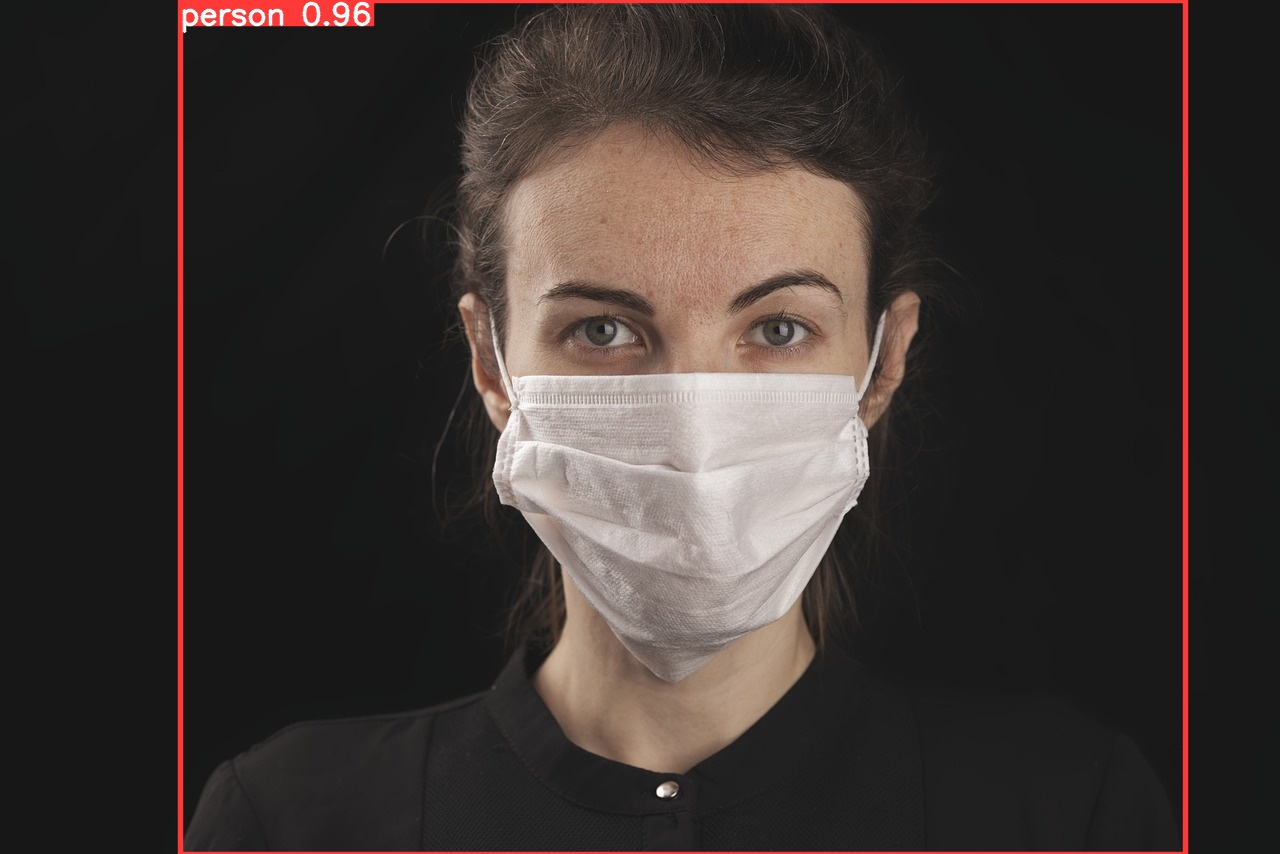

In [ ]:
from IPython.display import Image

Image(filename=f"/content/runs/detect/predict/woman-5951721_1280.jpg", width=1000)

# Define custom classes and running a prediction on an image.



In [ ]:
# Define custom classes
model.set_classes(["mask"])

# Execute prediction for specified categories on an image
results = model.predict('/content/woman-5951721_1280.jpg' , device='cpu' , save=True)

# Show results
results[0].show()

requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-v5r4ho7j
  Resolved https://github.com/ultralytics/CLIP.git to commit e17416a36b45d040758327936a1ea150c13fe3d1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 714.4 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369504 sha256=88910f3134e6746d7f447c096bf6c2f962ae4f8b2c3b3229542a3e456426503f
  Stored in directory: /tmp/pip-ephem-wheel-cache-sovl6ddk/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip

requirements: AutoUpdate success ✅ 21.5s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|███████████████████████████████████████| 338M/338M [00:08<00:00, 41.5MiB/s]



image 1/1 /content/woman-5951721_1280.jpg: 448x640 1 mask, 3108.6ms
Speed: 4.2ms preprocess, 3108.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


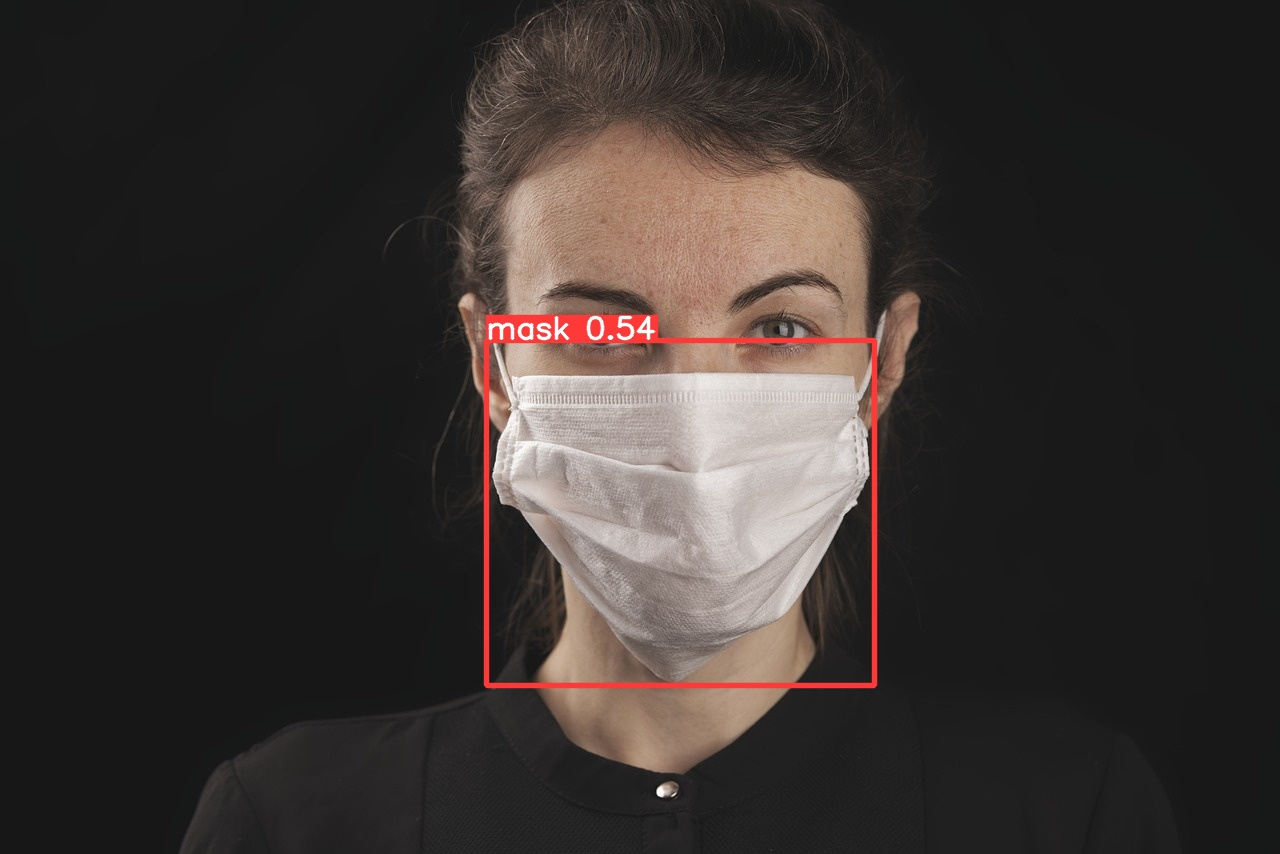

In [ ]:
from IPython.display import Image

Image(filename=f"/content/runs/detect/predict/woman-5951721_1280.jpg", width=1000)

#save a model after setting custom classes

In [ ]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO('yolov8l-world.pt')

model.set_classes(["mask"])

# Save the model with the defined offline vocabulary
model.save('cutom_yolo8l.pt')


####Note: After saving, the custom_yolov8l.pt model behaves like any other pre-trained YOLOv8 model but with a key difference: it detects only the classes you have specified.

#Load custom model and perform predictions


In [ ]:
from ultralytics import YOLO

# Load our custom model
model = YOLO('cutom_yolo8l.pt')


# Run inference to detect our custom classes
results = model.predict('/content/pexels-cottonbro-3957987.jpg', device='cpu', save=True)

# Show results
results[0].show()


image 1/1 /content/pexels-cottonbro-3957987.jpg: 448x640 4 masks, 2189.0ms
Speed: 4.3ms preprocess, 2189.0ms inference, 4.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


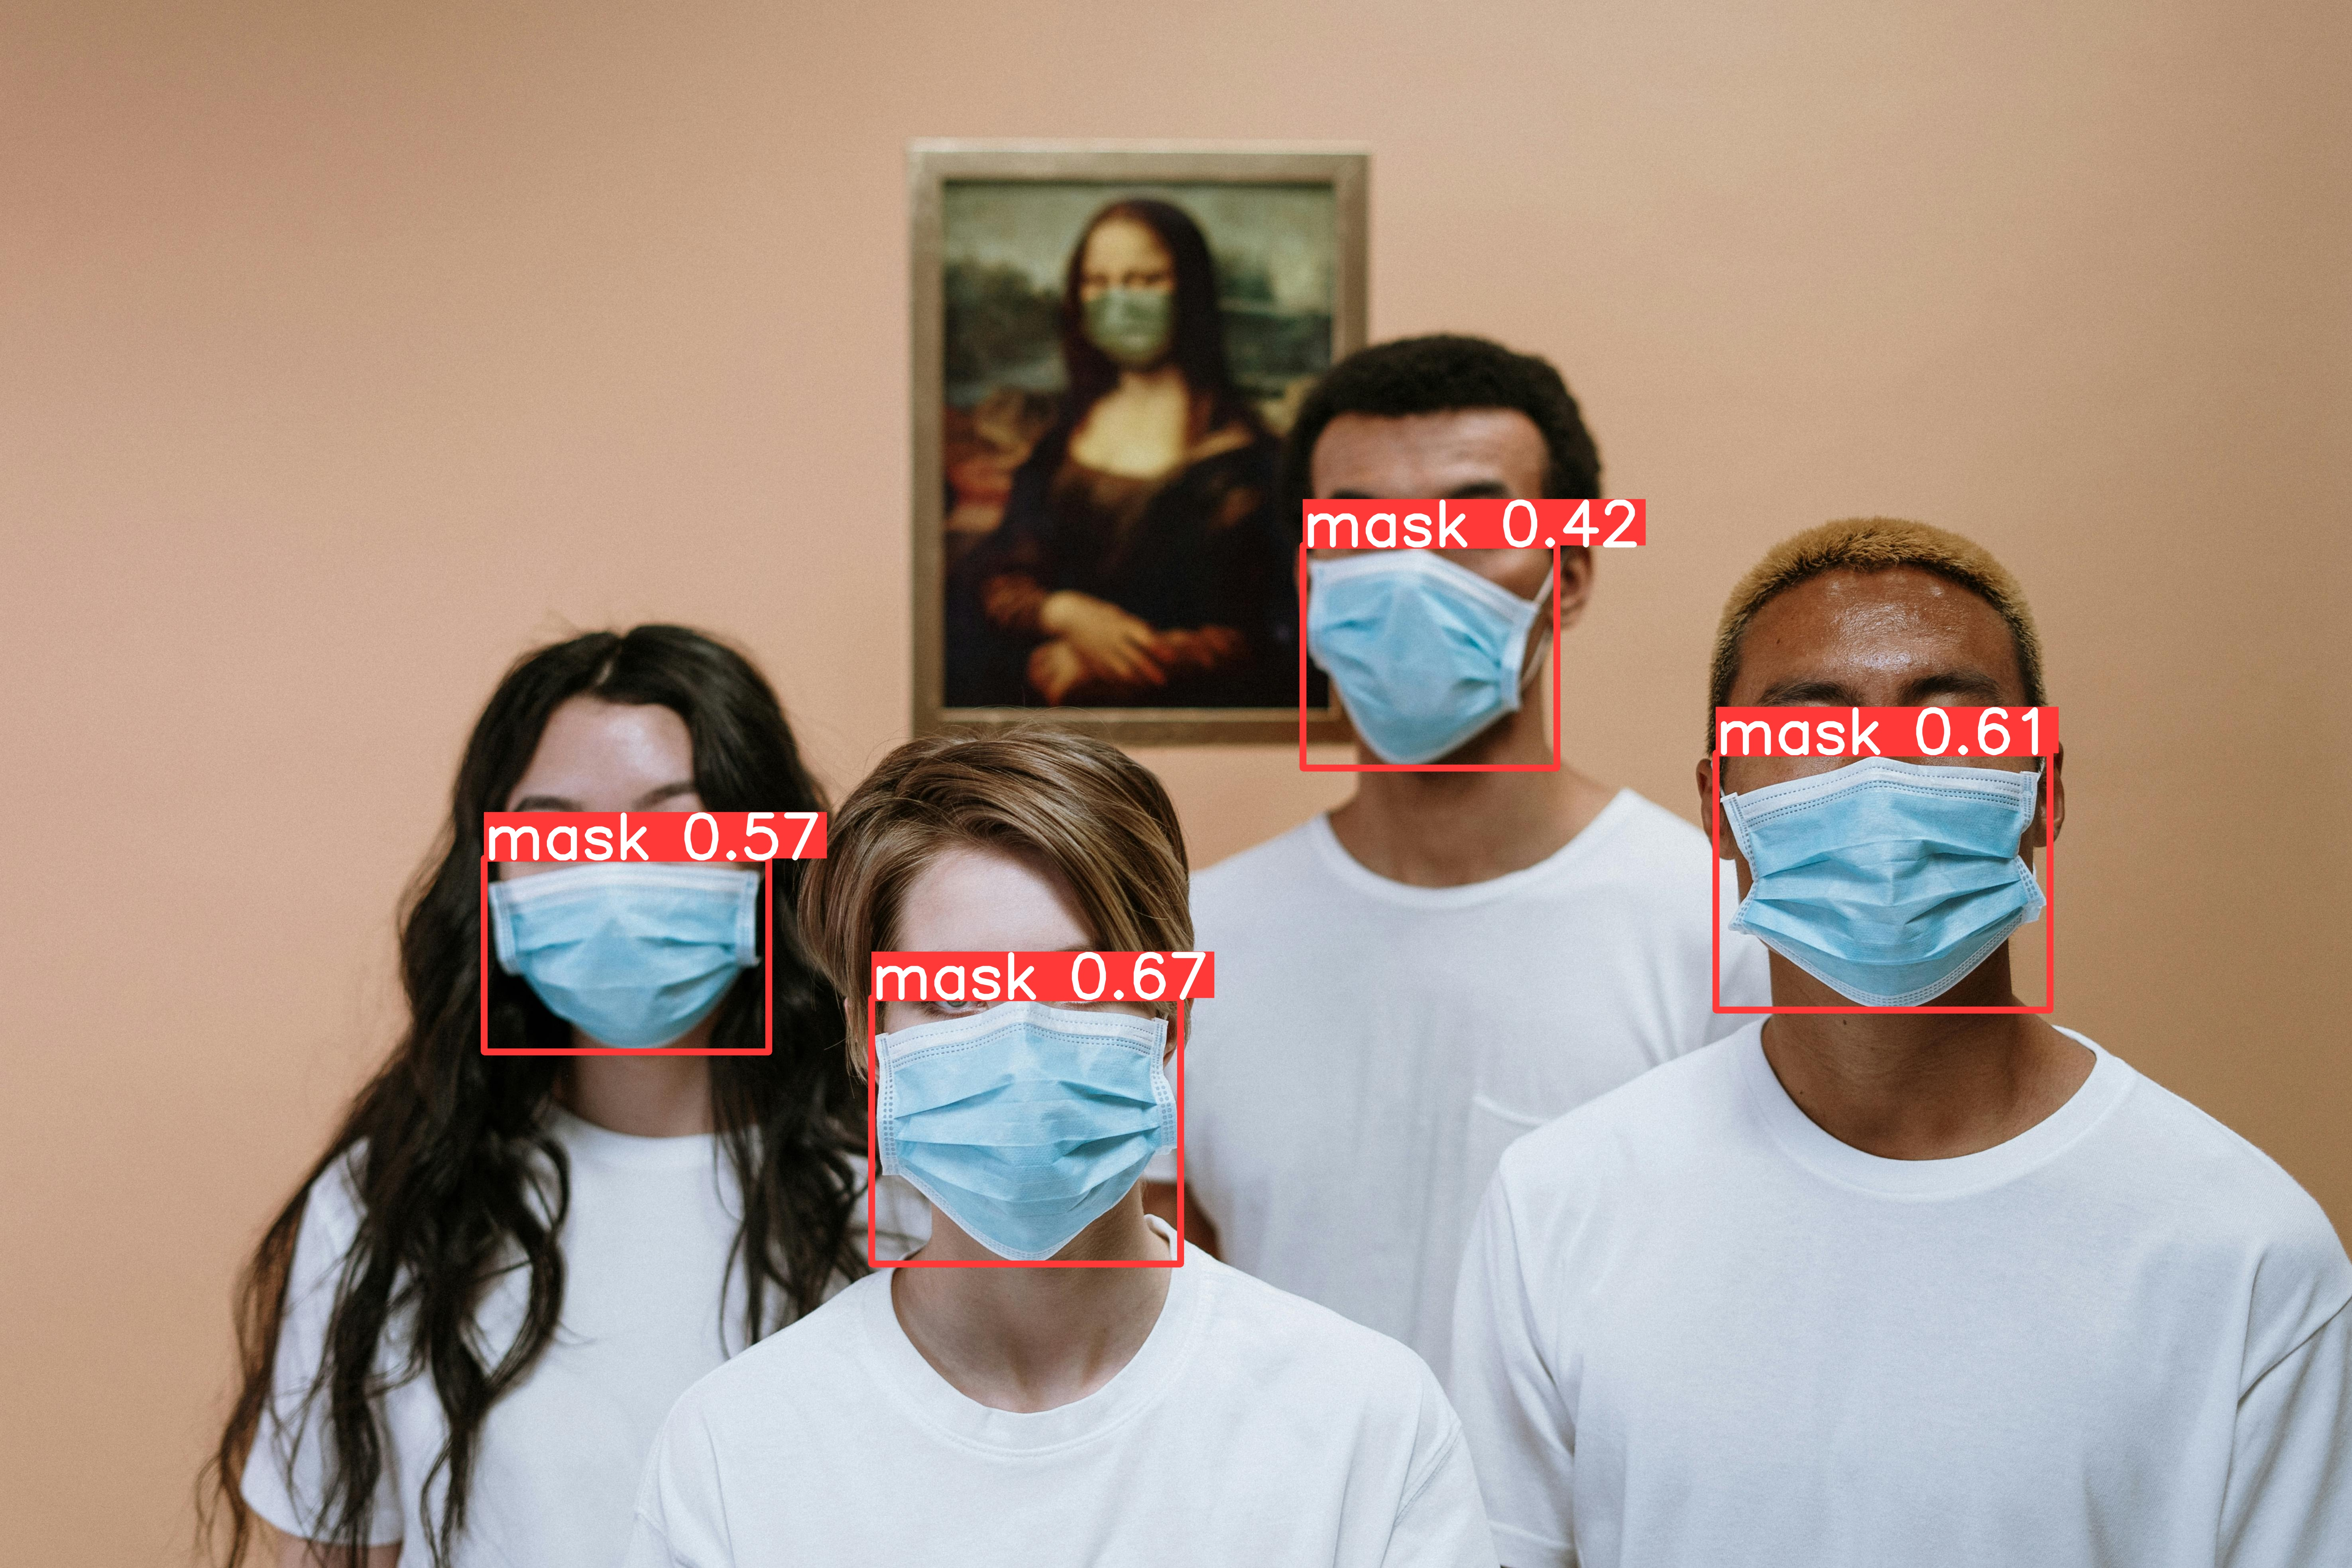

In [ ]:
from IPython.display import Image

Image(filename=f"/content/runs/detect/predict2/pexels-cottonbro-3957987.jpg", width=1000)

#test custom model on video and perform predictions

In [ ]:
from ultralytics import YOLO

# Load our custom model
model = YOLO('cutom_yolo8l.pt')


# Run inference to detect our custom classes
results = model.predict('/content/test.mp4', device='cpu', save=True)

# Show results
results[0].show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/297) /content/test.mp4: 640x384 (no detections), 2512.2ms
video 1/1 (frame 2/297) /content/test.mp4: 640x384 (no detections), 2324.7ms
video 1/1 (frame 3/297) /content/test.mp4: 640x384 (no detections), 2114.0ms
video 1/1 (frame 4/297) /content/test.mp4: 640x384 (no detections), 2772.8ms
video 1/1 (frame 5/297) /content/test.mp4: 640x384 (no detections), 3458.7ms
video 1/1 (frame 6/297) /content/test.mp4: 640x384 (no detections), 256

#Conclusion
The YOLO-World Model introduces an advanced, real-time Ultralytics YOLOv8-based approach for Open-Vocabulary Detection tasks. This innovation enables the detection of any object within an image based on descriptive texts. By significantly lowering computational demands while preserving competitive performance.